## Import libraries

In [28]:
import os
import pandas as pd
from google.colab import drive

## Configure Project Path and other paths

In [29]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [30]:
proj_path = '/content/drive/MyDrive/Magnimind/Face_detection/MP'
os.chdir(proj_path)

In [31]:
train_csv_path = os.path.join(proj_path, 'train_3D.csv')
test_csv_path = os.path.join(proj_path, 'test_3D.csv')

## Read data from csv to pandas dataframe

In [32]:
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

In [33]:
train_df.head()

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z
0,/content/drive/MyDrive/Magnimind/Face_detectio...,839,Autistic,0.511593,0.709910,-0.040127,0.517181,0.670308,-0.168715,0.515403,...,-0.057532,0.587559,0.500262,-0.077599,0.768636,0.474503,-0.021161,0.784336,0.468965,-0.021392
1,/content/drive/MyDrive/Magnimind/Face_detectio...,825,Autistic,0.566339,0.733220,-0.065258,0.575596,0.677747,-0.127426,0.568713,...,0.001300,0.609449,0.556148,-0.015839,0.738344,0.541875,0.039996,0.751471,0.531839,0.042270
2,/content/drive/MyDrive/Magnimind/Face_detectio...,817,Autistic,0.437217,0.744490,-0.077209,0.426740,0.685478,-0.165941,0.433244,...,-0.018598,0.488665,0.551752,-0.038808,0.656447,0.535078,0.003090,0.674554,0.525373,0.003349
3,/content/drive/MyDrive/Magnimind/Face_detectio...,845,Autistic,0.533727,0.797597,-0.053682,0.549781,0.762331,-0.169223,0.540980,...,-0.035548,0.601406,0.623819,-0.057016,0.766676,0.603243,0.013871,0.782729,0.596054,0.015662
4,/content/drive/MyDrive/Magnimind/Face_detectio...,844,Autistic,0.524054,0.774706,-0.052582,0.505436,0.710976,-0.152662,0.512779,...,-0.039194,0.528307,0.568924,-0.058087,0.683886,0.525732,-0.016595,0.697740,0.517121,-0.017281


In [34]:
test_df.head()

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z
0,/content/drive/MyDrive/Magnimind/Face_detectio...,100,Autistic,0.727391,0.710138,-0.117875,0.753489,0.581854,-0.193980,0.723864,...,0.048919,0.737665,0.421433,0.016144,0.890724,0.401811,0.169311,0.903891,0.394724,0.177334
1,/content/drive/MyDrive/Magnimind/Face_detectio...,108,Autistic,0.457443,0.710929,-0.091133,0.437796,0.633989,-0.193647,0.445459,...,-0.020685,0.482040,0.471925,-0.044690,0.660659,0.437236,0.013672,0.679693,0.424461,0.015152
2,/content/drive/MyDrive/Magnimind/Face_detectio...,106,Autistic,0.452099,0.779923,-0.042830,0.453784,0.726497,-0.181251,0.455887,...,-0.063696,0.546055,0.521134,-0.084867,0.749610,0.499630,-0.035831,0.771000,0.490222,-0.036383
3,/content/drive/MyDrive/Magnimind/Face_detectio...,1,Autistic,0.457504,0.754957,-0.085740,0.470419,0.687706,-0.211908,0.467041,...,-0.034361,0.565713,0.535771,-0.059295,0.783299,0.529403,0.008190,0.804902,0.522787,0.009052
4,/content/drive/MyDrive/Magnimind/Face_detectio...,103,Autistic,0.362426,0.740446,-0.046425,0.366750,0.668341,-0.156865,0.372543,...,-0.048113,0.491366,0.545638,-0.066218,0.686309,0.559731,-0.032427,0.705237,0.556214,-0.034047


In [35]:
train_df['label'].value_counts()

Autistic        1270
Non_Autistic     810
Name: label, dtype: int64

In [36]:
train_df[train_df.duplicated()]

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z


In [37]:
test_df['label'].value_counts()

Autistic        150
Non_Autistic    150
Name: label, dtype: int64

In [38]:
test_df[test_df.duplicated()]

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z


## Setting input features and output features

In [39]:
X = train_df['img_path']
y = train_df['label']

In [40]:
y.value_counts()

Autistic        1270
Non_Autistic     810
Name: label, dtype: int64

In [41]:
#y = y.map({'Autistic': 1, 'Non_Autistic': 0})

In [42]:
y.value_counts()

Autistic        1270
Non_Autistic     810
Name: label, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, shuffle=True, random_state=100)

In [44]:
X_test = test_df['img_path']
y_test = test_df['label']
#y_test = y_test.map({'Autistic': 1, 'Non_Autistic': 0})

In [45]:
# Initializing random_state
random_state = 100

In [46]:
# Input shape required by ResNet50
IMAGE_WIDTH=224
IMAGE_HEIGHT=224
IMAGE_CHANNELS=3
INP_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)
IMAGE_SIZE=(IMAGE_HEIGHT, IMAGE_WIDTH)
BATCH_SIZE = 64

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
from PIL import Image
from skimage import io, filters
from scipy import ndimage
import tensorflow as tf
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

In [48]:
# Load the pretrained ResNet model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=INP_SHAPE)

In [49]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [50]:
# Freeze all the layers of the pretrained model
for index, layer in enumerate(resnet_model.layers):
    print(index, layer)
    layer.trainable = False
    if index >= 161:
        layer.trainable = True

0 <keras.src.engine.input_layer.InputLayer object at 0x7c6753debf10>
1 <keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7c66a4196b60>
2 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7c66a4196a10>
3 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7c66a4194430>
4 <keras.src.layers.core.activation.Activation object at 0x7c6753de9fc0>
5 <keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7c66a4195810>
6 <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7c66a4195cc0>
7 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7c66a41e0f40>
8 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7c66a41e0fd0>
9 <keras.src.layers.core.activation.Activation object at 0x7c66a41e02e0>
10 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7c66a41e3370>
11 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7c66a41e3700>
12 <keras.src

In [51]:
#!pip install tensorflow --upgrade

In [52]:

# Create a new model
model = Sequential()
model.add(resnet_model)

# Add a custom output layer
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# We are using binary classification model to identify whether the given kid
# has autism or not
model.add(Dense(1, activation='sigmoid'))

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 64)                131136    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 23718913 (90.48 MB)
Trainable params: 5651585 (21.56 MB)
Non-trainable params: 18067328 (68.92 MB)
_______

In [54]:
resnetmodel_weights_filepath = 'resnetmodel_2_weights_best.hdf5'
if os.path.exists(resnetmodel_weights_filepath):
    model.load_weights(resnetmodel_weights_filepath)

In [55]:
from keras.optimizers import Adam

# Configure learning rate
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

In [56]:
# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy',
              metrics=['accuracy'])

In [57]:
# Define callbacks
callbacks = []

# Saving checkpoints
checkpoint = ModelCheckpoint(resnetmodel_weights_filepath, monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True, mode='max')
callbacks.append(checkpoint)

# Define early_stopping.
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=5,
                               verbose=1,
                               restore_best_weights=True)
callbacks.append(early_stopping)

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.1,
                              patience=3)
callbacks.append(reduce_lr)

In [58]:
#set a seed
seed = 1
np.random.seed(seed)

In [59]:
# Concatenate X_train and y_train
train_df = pd.concat([X_train, y_train], axis=1)
# Concatenate X_val and y_val
val_df = pd.concat([X_val, y_val], axis=1)
# Concatenate X_test and y_test
test_df = pd.concat([X_test, y_test], axis=1)

In [60]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   brightness_range=[0.5, 0.8],
                                   horizontal_flip=True)


train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col='img_path',
                                                    y_col='label',
                                                    seed=seed,
                                                    # all images will be resized to configured target size,
                                                    target_size=IMAGE_SIZE,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='binary',
                                                    )


Found 1560 validated image filenames belonging to 2 classes.


In [61]:
# preprocess_input from ResNet50
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator = val_datagen.flow_from_dataframe(dataframe=val_df,
                                                x_col='img_path',
                                                y_col='label',
                                                seed=seed,
                                                # all images will be resized to configured target size,
                                                target_size=IMAGE_SIZE,
                                                batch_size=BATCH_SIZE,
                                                class_mode='binary',
                                                )

Found 520 validated image filenames belonging to 2 classes.


In [62]:
# preprocess_input from ResNet50
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  x_col='img_path',
                                                  y_col='label',
                                                  seed=seed,
                                                  # all images will be resized to configured target size,
                                                  target_size=IMAGE_SIZE,
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='binary',
                                                  shuffle=False
                                                )

Found 300 validated image filenames belonging to 2 classes.


In [63]:
class_indices = train_generator.class_indices
label_names = list(class_indices.keys())

In [64]:
class_indices

{'Autistic': 0, 'Non_Autistic': 1}

In [65]:
label_names

['Autistic', 'Non_Autistic']

In [66]:
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=35,
                    callbacks=callbacks,
                    validation_data=val_generator,
                    validation_steps=len(val_generator))

Epoch 1/35
25/25 [==============================] - ETA: 0s - loss: 0.5750 - accuracy: 0.6904
Epoch 1: val_accuracy improved from -inf to 0.72500, saving model to resnetmodel_2_weights_best.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 49s 1s/step - loss: 0.5750 - accuracy: 0.6904 - val_loss: 0.5270 - val_accuracy: 0.7250 - lr: 1.0000e-04
Epoch 2/35
25/25 [==============================] - ETA: 0s - loss: 0.4477 - accuracy: 0.7872
Epoch 2: val_accuracy improved from 0.72500 to 0.75385, saving model to resnetmodel_2_weights_best.hdf5
25/25 [==============================] - 36s 1s/step - loss: 0.4477 - accuracy: 0.7872 - val_loss: 0.5031 - val_accuracy: 0.7538 - lr: 1.0000e-04
Epoch 3/35
25/25 [==============================] - ETA: 0s - loss: 0.3557 - accuracy: 0.8455
Epoch 3: val_accuracy improved from 0.75385 to 0.76731, saving model to resnetmodel_2_weights_best.hdf5
25/25 [==============================] - 37s 1s/step - loss: 0.3557 - accuracy: 0.8455 - val_loss: 0.5182 - val_accuracy: 0.7673 - lr: 1.0000e-04
Epoch 4/35
25/25 [==============================] - ETA: 0s - loss: 0.3185 - accuracy: 0.8641
Epoch 4: val_accuracy improved from 0.76731 to 0.76923, saving model to 

In [67]:
model.load_weights("resnetmodel_2_weights_best.hdf5")

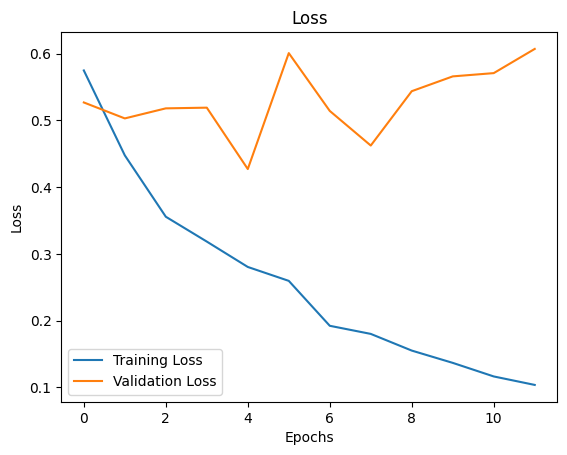

In [68]:
# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

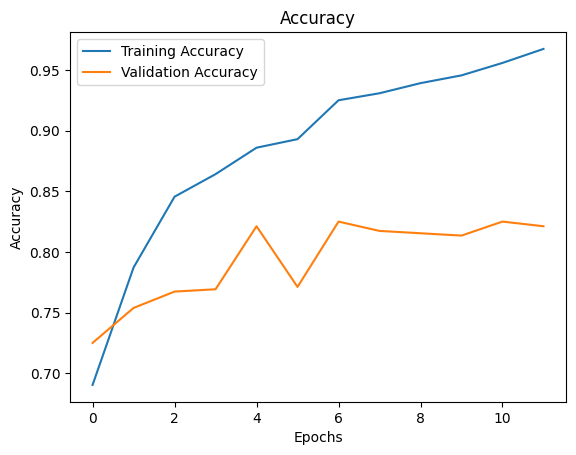

In [69]:
# Plot the precision curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [70]:
# Make predictions on the test dataset
predictions = model.predict(test_generator)

# Get the predicted class labels
predicted_labels = (predictions > 0.5).astype(int)
test_df['predicted_label'] = predicted_labels

# Get the ground truth labels
true_labels = test_generator.classes

# Calculate accuracy
accuracy = tf.keras.metrics.Accuracy()(true_labels, predicted_labels).numpy()
print("Accuracy: {:.2f}%".format(accuracy * 100))

5/5 [==============================] - 4s 717ms/step
Accuracy: 79.33%
